<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#Drift:-Measured-vs-Ideal" data-toc-modified-id="Drift:-Measured-vs-Ideal-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Drift: Measured vs Ideal</a></span><ul class="toc-item"><li><span><a href="#v2" data-toc-modified-id="v2-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>v2</a></span></li><li><span><a href="#v4" data-toc-modified-id="v4-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>v4</a></span></li><li><span><a href="#Calculate-ideal-means-and-SD-at-mult-2-and-3" data-toc-modified-id="Calculate-ideal-means-and-SD-at-mult-2-and-3-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Calculate ideal means and SD at mult 2 and 3</a></span></li><li><span><a href="#Plot-Drift-with-SD-error-bars" data-toc-modified-id="Plot-Drift-with-SD-error-bars-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Plot Drift with SD error bars</a></span></li></ul></li></ul></li></ul></div>

# Imports

In [1]:
### UPDATED by Daniel J Wilson

import hddm
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
import pylab
from scipy.stats import norm
import seaborn as sns
import scipy as sp

/Users/djw/anaconda/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


# Plots

## Drift: Measured vs Ideal 

### v2

In [2]:
# Load data
data = pd.read_csv("Analysis/HDDM/170913/Group/Desktop/stats_all_group_n23_reg3b_stats.csv", index_col=0)

# Note that this is actually the 3b model - DIC 24939.89...need to rerun the correct model...

### v4

In [31]:
# Load data
data = pd.read_csv("Analysis/HDDM/180208_test/Group/TEST_made_reg_v4.1/stats_all_group_n27_reg4.5_stats.csv", index_col=0)

In [32]:
data.head()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
z,0.498494,0.006683,0.485318,0.494103,0.498351,0.502877,0.511975,0.000152
z_std,0.108943,0.023165,0.068772,0.093036,0.107121,0.123114,0.159826,0.000736
z_subj.1,0.526260,0.015506,0.495648,0.515824,0.526388,0.537131,0.556486,0.000366
z_subj.2,0.508915,0.015153,0.479337,0.498901,0.508787,0.519413,0.537842,0.000338
z_subj.3,0.472588,0.015200,0.441091,0.462719,0.472741,0.482756,0.501715,0.000382


In [3]:
# Should be adding v intercept to v values?

v_int = data.loc['v_Intercept', 'mean']
v_int

0.060427272606129102

### Calculate ideal means and SD at mult 2 and 3

In [4]:
columns = ['meanFace', 'sdFace', 'meanHouse', 'sdHouse']
index = [1,2,3]
df = pd.DataFrame(index=index, columns=columns)
df = df.fillna(0) # with 0s rather than NaNs
df

,meanFace,sdFace,meanHouse,sdHouse
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0


In [5]:
df.iloc[0,0] = data.loc['v_face_mult_1', 'mean'] + v_int
df.iloc[0,1] = data.loc['v_face_mult_1', 'std']
df.iloc[0,2] = data.loc['v_house_mult_1', 'mean']+ v_int
df.iloc[0,3] = data.loc['v_house_mult_1', 'std']

df.iloc[1,0] = data.loc['v_face_mult_1', 'mean'] * 2+ v_int
df.iloc[1,1] = data.loc['v_face_mult_1', 'std'] * 2
df.iloc[1,2] = data.loc['v_house_mult_1', 'mean'] * 2+ v_int
df.iloc[1,3] = data.loc['v_house_mult_1', 'std'] * 2

df.iloc[2,0] = data.loc['v_face_mult_1', 'mean'] * 3+ v_int
df.iloc[2,1] = data.loc['v_face_mult_1', 'std'] * 3
df.iloc[2,2] = data.loc['v_house_mult_1', 'mean'] * 3+ v_int
df.iloc[2,3] = data.loc['v_house_mult_1', 'std'] *3

df

,meanFace,sdFace,meanHouse,sdHouse
1,0.555877,0.020777,0.447811,0.021005
2,1.051328,0.041553,0.835195,0.042010
3,1.546778,0.062330,1.222579,0.063015


In [6]:
data.loc['v_face_mult_2', 'std']

0.038247432859623454

In [37]:
# scipy.stats.ttest_ind_from_stats(mean1(measured), std1, nobs1, mean2(ideal), std2, nobs2, equal_var=True)

# Face Mult = 2
sp.stats.ttest_ind_from_stats(data.loc['v_face_mult_2', 'mean'], data.loc['v_face_mult_2', 'std'], 23,
                             df.iloc[1,0], df.iloc[1,1], 23)

Ttest_indResult(statistic=-58.041934796317598, pvalue=3.219407888174668e-43)

In [38]:
# House Mult = 2
sp.stats.ttest_ind_from_stats(data.loc['v_house_mult_2', 'mean'], data.loc['v_house_mult_2', 'std'], 23,
                             df.iloc[1,2], df.iloc[1,3], 23)

Ttest_indResult(statistic=-62.447524047610095, pvalue=1.3371074050845327e-44)

In [39]:
# Face Mult = 3
sp.stats.ttest_ind_from_stats(data.loc['v_face_mult_3', 'mean'], data.loc['v_face_mult_3', 'std'], 23,
                             df.iloc[2,0], df.iloc[2,1], 23)

Ttest_indResult(statistic=-88.852846967006371, pvalue=2.7556138156910534e-51)

In [40]:
# House Mult = 3
sp.stats.ttest_ind_from_stats(data.loc['v_house_mult_3', 'mean'], data.loc['v_house_mult_3', 'std'], 23,
                             df.iloc[2,2], df.iloc[2,3], 23)

Ttest_indResult(statistic=-89.472374363104734, pvalue=2.0330976910858714e-51)

### Plot Drift with SD error bars

In [41]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


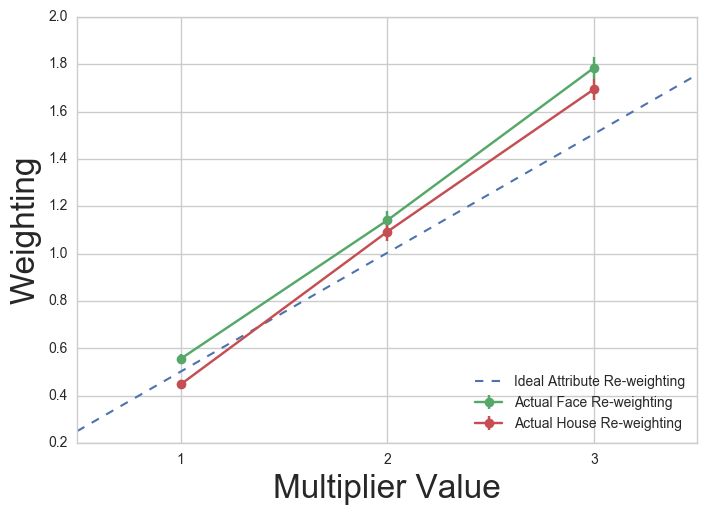

In [8]:
#plt.rcParams['axes.facecolor'] = 'white'
plt.style.use('seaborn-whitegrid')

initValFace = data.loc['v_face_mult_1', 'mean'] + v_int
initValHouse = data.loc['v_house_mult_1', 'mean'] + v_int
x = np.linspace(0.5,3.5,1000)

# Ideal Values
yFace = x*initValFace
yHouse = x*initValHouse

# Actual Values
xMult = np.array([1,2,3]) 
yFaceActual = np.array([data.loc['v_face_mult_1', 'mean'] + v_int, 
                        data.loc['v_face_mult_2', 'mean'] + v_int,
                        data.loc['v_face_mult_3', 'mean'] + v_int])
yHouseActual = np.array([data.loc['v_house_mult_1', 'mean'] + v_int,
                         data.loc['v_house_mult_2', 'mean'] + v_int,
                         data.loc['v_house_mult_3', 'mean'] + v_int])

# SD
eFace = np.array([data.loc['v_face_mult_1', 'std'], data.loc['v_face_mult_2', 'std'], data.loc['v_face_mult_3', 'std']])
eHouse = np.array([data.loc['v_house_mult_1', 'std'], data.loc['v_house_mult_2', 'std'], data.loc['v_house_mult_3', 'std']])

# PLOT

# Idealized weighting
#ideal_line1, = plt.plot(x,yFace, linestyle='--', label = "Ideal Face Re-weighting")
#ideal_line2, = plt.plot(x,yHouse, linestyle= '--', label = "Ideal House Re-weighting")
ideal_line3, = plt.plot(x,(yHouse + yFace)/2, linestyle= '--', label = "Ideal Attribute Re-weighting", linewidth = "1.5")

# Starting dots
# plt.plot(1,data.loc['v_face_mult_1', 'mean'] + v_int, marker='o', label = "Face Weight: Mult = 1")
# plt.plot(1,data.loc['v_house_mult_1', 'mean'] + v_int, marker='o', label = "House Weight: House = 1")

# Actual weighting
plt.errorbar(xMult, yFaceActual, eFace, linestyle='-', fmt='o', label = "Actual Face Re-weighting")
plt.errorbar(xMult, yHouseActual, eHouse, linestyle='-', fmt='o', label = "Actual House Re-weighting")

plt.xlabel("Multiplier Value", fontsize = 24)
plt.ylabel("Weighting", fontsize = 24)
plt.xticks(np.arange(1, 4, 1))
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right='off',      # ticks along the bottom edge are off
    top='off')         # ticks along the top edge are off

plt.legend(loc = 4)
plt.show()
plt.close()
#plt.savefig('/Users/djw/Desktop/weighting.pdf', bbox_inches='tight')

# savefig('plt.png', facecolor=fig.get_facecolor(), transparent=True)

In [14]:
mean = data.loc['v_face_mult_1', 'mean']
sd = data.loc['v_face_mult_1', 'std']

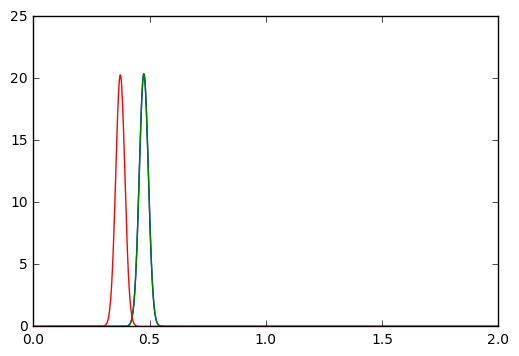

In [19]:
x = np.linspace(0,2,1000)
mean = data.loc['v_face_mult_1', 'mean']
sd = data.loc['v_face_mult_1', 'std']
y1 = norm.pdf(x, loc=mean, scale=sd)    # mean = loc, sd = scale
mean = data.loc['v_house_mult_1', 'mean']
sd = data.loc['v_house_mult_1', 'std']
y2 = norm.pdf(x, loc=mean, scale=sd)    # mean = loc, sd = scale
pylab.plot(x,y1)
pylab.plot(x,y2)
pylab.show()